In [1]:
import pandas as pd

In [2]:
df_labels = pd.read_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/final_labels.csv', index_col=[0])

In [3]:
df_labels = df_labels[df_labels['Dehumanization']!='не можу визначитись з правильною відповіддю'].copy()

In [4]:
df_labels['label'] = df_labels['Dehumanization'].apply(lambda x: 0 if x=='ні' else 1)

In [5]:
df_labels.text[10]

'Как минимум, нам всем надо понимать, что победа, даже просто над укронацизмом, уже не вернет нам 2013 год.'

## Helper fuctions

In [6]:
import openai

In [11]:
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.environ.get("OPENAI_API_KEY")
if api_key is None:
    raise ValueError("The OPENAI_API_KEY environment variable is not set.")

openai.api_key=api_key

In [12]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]

## Variants of the dehumanization context

In [13]:
definition_zero = ''

In [14]:
definition_zero_w_min_backgroud = 'These texts are collected from Telegram blogs of Russian political influencers and are intended for the Russian audience. '

In [15]:
definition_from_paper = f'''The growing conceptual literature offers new perspectives on dehumanization that contribute to a deeper understanding of this phenomenon, especially when coupled with the work of specialist scholars in neuroscience, psychology, philosophy, genocide studies, and computational linguistics. The most prominent contemporary theories from these disciplines include the (i) UH-NH model of dehumanization that delineates the animalistic and mechanistic dehumanization by Haslam (ii) model within the mind perception theory which distinguishes between denying human agency and experience from Epley and Waytz (iii) the Dehumanized Perception Model within the stereotype content model, which distinguishes between denying competence and warmth by Harris and Fiske (iv) a mixed model of (de)humanization by Li which aims at integrating the aforementioned models (v) ABC model comprised of the denying or ascribing the affective, behavioral, and cognitive dimensions of agency by Tipler and Ruscher. To expand our understanding of the dehumanization within the scope of mass violence, we turn to the work of Leader Maynard et al. for the context and content of the narratives that induce genocidal behavior and consider the toxification component of dehumanization as a more precise warning sign for genocide than dehumanization understood broadly. To properly quantify linguistic correlates of component psychological processes that contribute to dehumanization, we offer the definition of dehumanization that is both informed by the work mentioned above and well suited for our particular scope. We define dehumanization as the representation of the target group as existentially threatening and/or morally deficient by blatantly or subtly manipulating the features of its human uniqueness (including relevant elements in agency and competence) and/or human nature (including relevant elements in experience and warmth). '''

In [16]:
file_path = "/Users/katerynaburovova/PycharmProjects/dehumanization/ChatGPT3.5_experiments/annotation_instructions_part1.txt"

with open(file_path, "r", encoding="utf-8") as file:
    definition_from_annotation_instructions = file.read()

print(definition_from_annotation_instructions)

﻿Дегуманізація в контексті нашого дослідження — це таке представлення в тексті групи людей, яке формує образ, позбавлений всіх або деяких унікально людських рис або рис, властивих всім живим істотам.

Будь ласка, читайте речення повністю. Кожне додаткове слово може містити контекст, який може вплинути на відповідь.
Якщо ви бачите в тексті посилання, будь ласка, ігноруйте їх — зміст матеріалів за посиланням не має впливати на ваші відповіді.

Дегуманізація присутня, якщо в тексті є хоча б одна з перерахованих нижче ознак дегуманізації українців:
1. Прирівнювання українців до неістот, наприклад, до хвороби, вірусів, сил природи, об’єктів, інструментів, майна. Таке прирівнювання може виражатись також опосередковано: наприклад, в “утилизировать укров”, поняття “утилизировать” непрямо вказує на те, що йдеться про неістот, а в “воевать до последнего украинца” вказується на роль українців як інструмента.
2. Прирівнювання українців до істот, позбавленими всіх або деяких унікально  людських рис

ChatGPT ultimately translates everything ignoring the instructions not to translate quotes.

In [17]:
definition_from_annotation_instructions_eng = get_completion(f'Translate the parts of the text that\'s not in quotation marks from Ukrainian into English. Do not translate quotes, just leave it unchanged: {definition_from_annotation_instructions}')
definition_from_annotation_instructions_eng

'"Degumanization in the context of our research is the representation of a group of people in text that forms an image devoid of all or some unique human characteristics or characteristics common to all living beings.\n\nPlease read the sentences in full. Each additional word may contain context that can affect your response.\nIf you see references in the text, please ignore them - the content of the materials at the link should not affect your answers.\n\nDegumanization is present if the text contains at least one of the following signs of degumanization of Ukrainians:\n1. Equating Ukrainians to non-living things, such as diseases, viruses, forces of nature, objects, instruments, property. Such equating can also be expressed indirectly: for example, in "utilizing Ukrainians", the concept of "utilizing" indirectly indicates that non-living things are being referred to, and in "fighting to the last Ukrainian", Ukrainians are referred to as instruments.\n2. Equating Ukrainians to beings 

In [18]:
definition_from_annotation_instructions_eng = get_completion(f'Translate the parts of the text that\'s not in quotation marks from Ukrainian into English. Translate Дегуманізація as Dehumanization. Do not translate quotes, just leave it unchanged: {definition_from_annotation_instructions}')
definition_from_annotation_instructions_eng

'Dehumanization in the context of our research is the representation of a group of people in a text that forms an image devoid of all or some unique human characteristics or characteristics common to all living beings.\n\nPlease read the sentences in full. Each additional word may contain context that can affect your response.\nIf you see references in the text, please ignore them - the content of the materials at the link should not affect your answers.\n\nDehumanization is present if the text contains at least one of the following signs of dehumanization of Ukrainians:\n1. Equating Ukrainians with non-living things, such as diseases, viruses, forces of nature, objects, instruments, property. Such equating can also be expressed indirectly: for example, in "utilizing Ukrainians", the concept of "utilizing" indirectly indicates that non-living things are involved, and in "fighting to the last Ukrainian", Ukrainians are referred to as instruments.\n2. Equating Ukrainians with beings devo

In [19]:
definition_from_annotation_instructions_eng

'Dehumanization in the context of our research is the representation of a group of people in a text that forms an image devoid of all or some unique human characteristics or characteristics common to all living beings.\n\nPlease read the sentences in full. Each additional word may contain context that can affect your response.\nIf you see references in the text, please ignore them - the content of the materials at the link should not affect your answers.\n\nDehumanization is present if the text contains at least one of the following signs of dehumanization of Ukrainians:\n1. Equating Ukrainians with non-living things, such as diseases, viruses, forces of nature, objects, instruments, property. Such equating can also be expressed indirectly: for example, in "utilizing Ukrainians", the concept of "utilizing" indirectly indicates that non-living things are involved, and in "fighting to the last Ukrainian", Ukrainians are referred to as instruments.\n2. Equating Ukrainians with beings devo

In [20]:
definitions_list = [definition_zero, definition_zero_w_min_backgroud, definition_from_paper, definition_from_annotation_instructions, definition_from_annotation_instructions_eng]

In [21]:
definitions_list = [x.strip('"') for x in definitions_list]

In [22]:
definitions_list

['',
 'These texts are collected from Telegram blogs of Russian political influencers and are intended for the Russian audience. ',
 'The growing conceptual literature offers new perspectives on dehumanization that contribute to a deeper understanding of this phenomenon, especially when coupled with the work of specialist scholars in neuroscience, psychology, philosophy, genocide studies, and computational linguistics. The most prominent contemporary theories from these disciplines include the (i) UH-NH model of dehumanization that delineates the animalistic and mechanistic dehumanization by Haslam (ii) model within the mind perception theory which distinguishes between denying human agency and experience from Epley and Waytz (iii) the Dehumanized Perception Model within the stereotype content model, which distinguishes between denying competence and warmth by Harris and Fiske (iv) a mixed model of (de)humanization by Li which aims at integrating the aforementioned models (v) ABC model

## Instructions for processing variants

## Modeling the role

In [23]:
no_role = ''

In [24]:
social_scientist_role = 'Act as a professional social scientist who performs an observational study on dehumanization. '

In [25]:
psychologist_role = 'Act as a professional psychologist who performs an observational study on dehumanization. '

In [26]:
NLP_role = 'Act as a professional NLP researcher who performs an observational study on dehumanization. '

In [27]:
roles_list = [no_role, social_scientist_role, psychologist_role, NLP_role]

## Thinking process

In [28]:
no_thinking_instructions = ''

In [29]:
thinking_with_focus_on_mention= "Focus first on whether you think the particular text is related to Ukraine or Ukrainians, and if so - decide whether Ukrainians are dehumanized subtly or blatantly. If there is no such metaphor, then there\'s no dehumanization. If there is any, there is a dehumanization. "

In [30]:
thinking_w_extracting_signals = 'First extract the signals of the dehumanization of Ukrainians. If there is no such metaphor, then there\'s no dehumanization. If there is any, there is a dehumanization. '

In [31]:
thinking_w_extracting_metaphor = 'First extract a metaphor that is subtly or blatantly used to dehumanize Ukrainians. If there is no such metaphor, then there\'s no dehumanization. If there is any, there is a dehumanization. '

In [32]:
thinking_modes_list = [no_thinking_instructions, thinking_with_focus_on_mention, thinking_w_extracting_signals, thinking_w_extracting_metaphor]

## Output instructions

In [33]:
output_list = 'I\'m going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains the dehumanization of Ukrainians and 0 if it does not contain the dehumanization of Ukrainians. The quantity of labels in your output should equal the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 0, 1]. Do not output anything else.'

In [34]:
output_json = 'I\'m going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains dehumanization of Ukrainians and 0 if it does not contain dehumanization of Ukrainians. Output the result in the format of a json file with sentence as key and a binary label as a value. '

In [35]:
output_list_w_explanation = 'I\'m going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains dehumanization of Ukrainians and 0 if it does not contain dehumanization of Ukrainians. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided. '

In [36]:
# output_modes_list = [output_list, output_list_w_explanation]
output_modes_list = [output_list]

## Prompt construction

In [37]:
prompt_list = []
for definition in definitions_list:
    for role in roles_list:
        for thinking_mode in thinking_modes_list:
            for output_mode in output_modes_list:
                prompt = f'{role}{definition}{output_mode}{thinking_mode}'
                prompt_list.append(prompt)

In [38]:
len(prompt_list)

80

In [39]:
prompt_list[79]

'Act as a professional NLP researcher who performs an observational study on dehumanization. Dehumanization in the context of our research is the representation of a group of people in a text that forms an image devoid of all or some unique human characteristics or characteristics common to all living beings.\n\nPlease read the sentences in full. Each additional word may contain context that can affect your response.\nIf you see references in the text, please ignore them - the content of the materials at the link should not affect your answers.\n\nDehumanization is present if the text contains at least one of the following signs of dehumanization of Ukrainians:\n1. Equating Ukrainians with non-living things, such as diseases, viruses, forces of nature, objects, instruments, property. Such equating can also be expressed indirectly: for example, in "utilizing Ukrainians", the concept of "utilizing" indirectly indicates that non-living things are involved, and in "fighting to the last Ukr

## Text input processing

In [40]:
"""
Dividing text series into batches
"""
def process_df_input(df, batch_size):
    batch_size = batch_size
    num_batches = (len(df) + batch_size - 1) // batch_size
    text_batches = [
        df.text.iloc[i * batch_size : (i + 1) * batch_size].tolist()
        if i < num_batches - 1
        else df.text.iloc[i * batch_size :].tolist()
        for i in range(num_batches)
    ]
    text_batches = ["\n```".join(batch) for batch in text_batches]

    return text_batches

In [41]:
"""
prompts will look like this
"""
def get_chatpt_label_sent_EXAMPLE(df):
    for prompt_format in prompt_list:
        for text in process_df_input(df,3):
            prompt = f'{prompt_format} \n```{text}'
            print(prompt)
            print('*'*20)

In [42]:
get_chatpt_label_sent_EXAMPLE(df_testing)

NameError: name 'df_testing' is not defined

### The format of the output is unstable and often inconsistent with the input shape

Adding instructions to check shape and providing example does not do much. Jsons are also incorrectly formatted.

In [ ]:
df_sample_labels = df_labels.sample(20, random_state=42).copy()

In [531]:
test_prompt_list = prompt_list[:2]

In [539]:
import time
from sklearn.metrics import classification_report

def get_chatpt_label_sent_verbose(df, prompt_list, batch_size=5):
    response_list = []
    for prompt_format in prompt_list:
        responses_per_prompt = []
        for text_batch in process_df_input(df,batch_size):
            print('$'*30)
            print(len(text_batch.split("\n```")))
            print(text_batch)
            print('$'*30)
            time.sleep(20)
            prompt = f'{prompt_format} \n```{text_batch}'
            print('*'*30)
            print(prompt)
            print('*'*30)
            response = get_completion(prompt)
            print('^'*30)
            print(len(response.split(' ')))
            print(response)
            print('^'*30)
            responses_per_prompt.append(response)
            if len(response.split(' '))==len(text_batch.split('```')):
                print('Batch input and output match')
            else:
                print('MISMATCH IN SHAPE OF THE INPUT AND OUTPUT')
        response_list.append(responses_per_prompt)
    return response_list

In [540]:
tst_resp = get_chatpt_label_sent_verbose(df_sample_labels, test_prompt_list)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
5
Действительно, вмешиваться в американские выборы и одновременно «курощать» укронацистов довольно хлопотно.
```Как вы прекрасно знаете из наших многочисленных сообщения, мы - Екатерина Котрикадзе и Тихон Дзядко - завели свой Ютуб-канал.
```Новая серия от разведки ЮВО, продолжающей кошмарить хохлов.
```Бандерлоги всё никак не успокоятся.
```Командир подразделения укронацистов рыдает на тему Песок.
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
******************************
I'm going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains dehumanization of Ukrainians and 0 if it does not contain dehumanization of Ukrainians. The quantity of labels in your output should be equal to the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 

In [541]:
def get_chatpt_label_sent(df, prompt_list, batch_size=5):
    response_list = []
    for prompt_format in prompt_list:
        responses_per_prompt = []
        for text_batch in process_df_input(df,batch_size):
            time.sleep(20)
            prompt = f'{prompt_format} \n```{text_batch}'
            response = get_completion(prompt)
            responses_per_prompt.append(response)
            if len(response.split(' '))==len(text_batch.split('```')):
                print('Batch input and output match')
            else:
                print('MISMATCH IN SHAPE OF THE INPUT AND OUTPUT')
        response_list.append(responses_per_prompt)
    return response_list

In [535]:
df_sample_labels = df_labels.sample(21, random_state=42).copy()

tst_resp = get_chatpt_label_sent(df_sample_labels, test_prompt_list, 3)

Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match


In [543]:
df_sample_labels = df_labels.sample(40, random_state=42).copy()

tst_resp = get_chatpt_label_sent(df_sample_labels, test_prompt_list, 8)

Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
Batch input and output match
Batch input and output match
Batch input and output match
Batch input and output match
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT


In [544]:
df_sample_labels = df_labels.sample(80, random_state=42).copy()

tst_resp = get_chatpt_label_sent(df_sample_labels, test_prompt_list, 20)

MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT
MISMATCH IN SHAPE OF THE INPUT AND OUTPUT


In [175]:
# def process_response(response):
#     y_true = df_testing.label.to_list()
#     y_pred = [int(x) for x in response.strip("'").split(' ')]
#     target_names = ['class 0', 'class 1']
#     print(classification_report(y_true, y_pred, target_names=target_names))

## Approach that factors in output instability

In [614]:
"""
We split the df into partial dfs
"""
def process_df_input(df, batch_size):
    num_batches = (len(df) + batch_size - 1) // batch_size
    df_batches = [
        df.iloc[i * batch_size : (i + 1) * batch_size].copy()
        if i < num_batches - 1
        else df.iloc[i * batch_size :].copy()
        for i in range(num_batches)
    ]
    return df_batches

In [615]:
df_sample_labels = df_labels.sample(20, random_state=42).copy()

In [686]:
results_folder = '/Users/katerynaburovova/PycharmProjects/dehumanization/ChatGPT3.5_experiments/test_results'

In [46]:
import pickle

In [860]:
def get_predictions_and_evals(df, results_folder, batch_size=5, prompt_list=test_prompt_list):
    target_names = ['class 0', 'class 1']
    all_results = []
    for idx, prompt_format in enumerate(prompt_list):
        if idx<=57:
            continue
        else:
            print('='*80)
            print(f'\n{prompt_format}')
            print('='*80)
            cols_list = df.columns + 'chat_gpt_preds'
            df_per_promt = pd.DataFrame(columns=cols_list)
            broken_outputs_per_promt = 0
            for df_batch in process_df_input(df,batch_size):
                texts_in_batch = df_batch.text.to_list()
                current_text_batch_shape = len(texts_in_batch)
                text_batches = "\n```".join(texts_in_batch)
                print(text_batches)
                time.sleep(20)
                prompt = f'{prompt_format} \n```{text_batches}'
                response = get_completion(prompt)
                response_list = response.strip(']').strip('[').split(', ')

                try:
                    response_list = [int(x) for x in response_list]
                except ValueError as e:
                    print(f"Error: {e}")
                    broken_outputs_per_promt += 1
                    continue

                current_response_shape = len(response_list)
                print(response)

                if current_text_batch_shape==current_response_shape:
                    print('Shapes match')
                    df_batch['chat_gpt_preds'] = response_list
                    df_per_promt = pd.concat([df_per_promt, df_batch], ignore_index=True)
                else:
                    broken_outputs_per_promt+=1
                    print('SHAPES DON\'T MATCH')
            class_report_dict = classification_report(df_per_promt['label'],
                                                        df_per_promt['chat_gpt_preds'],
                                                        target_names=target_names,
                                                        output_dict=True)
            class_report_nice = classification_report(df_per_promt['label'],
                                                        df_per_promt['chat_gpt_preds'],
                                                        target_names=target_names)

            results_list = [class_report_dict, class_report_nice, broken_outputs_per_promt, prompt_format]
            results_pkl_file = os.path.join(results_folder, f"prompt_{idx}_results.pkl")
            with open(results_pkl_file, 'wb') as f:
                pickle.dump(results_list, f)
            all_results.append([class_report_dict, class_report_nice, broken_outputs_per_promt, prompt_format])

    return all_results

In [841]:
# df_sample_labels = df_labels.sample(10, random_state=42).copy()
# test_prompt_list = prompt_list[:2]

In [842]:
# res = get_predictions_and_evals(df_sample_labels, prompt_list = test_prompt_list)

In [843]:
df_sample_labels = df_labels.sample(100, random_state=42).copy()

In [43]:
results_folder = '/Users/katerynaburovova/PycharmProjects/dehumanization/ChatGPT3.5_experiments/results'

In [861]:
%time
res = get_predictions_and_evals(df_sample_labels, results_folder = results_folder, prompt_list = prompt_list)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 5.25 µs

Act as a professional psychologist who performs an observational study on dehumanization. ﻿Дегуманізація в контексті нашого дослідження — це таке представлення в тексті групи людей, яке формує образ, позбавлений всіх або деяких унікально людських рис або рис, властивих всім живим істотам.

Будь ласка, читайте речення повністю. Кожне додаткове слово може містити контекст, який може вплинути на відповідь.
Якщо ви бачите в тексті посилання, будь ласка, ігноруйте їх — зміст матеріалів за посиланням не має впливати на ваші відповіді.

Дегуманізація присутня, якщо в тексті є хоча б одна з перерахованих нижче ознак дегуманізації українців:
1. Прирівнювання українців до неістот, наприклад, до хвороби, вірусів, сил природи, об’єктів, інструментів, майна. Таке прирівнювання може виражатись також опосередковано: наприклад, в “утилизировать укров”, поняття “утилизировать” непрямо вказує на те, що йдеться про неістот, а в “воевать

In [91]:
# def load_results(results_folder):
#     all_results = []
#     for filename in os.listdir(results_folder):
#         if filename.endswith(".pkl"):
#             file_path = os.path.join(results_folder, filename)
#             with open(file_path, 'rb') as f:
#                 results_list = pickle.load(f)
#                 all_results.append([results_list, filename])
#     return all_results
def load_results(results_folder):
    all_results = []
    filenames = [filename for filename in os.listdir(results_folder) if filename.endswith(".pkl")]

    for filename in sorted(filenames):
        file_path = os.path.join(results_folder, filename)
        with open(file_path, 'rb') as f:
            results_list = pickle.load(f)
            all_results.append([results_list, filename])
    return all_results

In [88]:
loaded_results = load_results(results_folder)

In [123]:
loaded_results_tst = [item[0]+[item[1]] for item in load_results(results_folder)]


In [127]:
len(loaded_results_tst[0])

5

In [185]:
def print_all_results(res):
    results = [item[0]+[item[1]] for item in res]
    print(len(results[0]))
    for report, nice_report, broken_outputs, prompt_format, indx, indx in results:
        print(f"Prompt {indx}:")
        print("\n" + "=" * 80 + "\n")
        print(f"{prompt_format}:")
        print("\n" + "=" * 80 + "\n")
        print(f"Classification report:\n{nice_report}")
        print(f"Broken outputs: {broken_outputs}")
        print("\n" + "=" * 80 + "\n")

In [186]:
print_all_results(loaded_results)

6
Prompt prompt_0_results.pkl:


I'm going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains the dehumanization of Ukrainians and 0 if it does not contain the dehumanization of Ukrainians. The quantity of labels in your output should equal the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 0, 1]. Do not output anything else.:


Classification report:
              precision    recall  f1-score   support

     class 0       0.93      0.63      0.75        43
     class 1       0.74      0.96      0.83        47

    accuracy                           0.80        90
   macro avg       0.83      0.79      0.79        90
weighted avg       0.83      0.80      0.79        90

Broken outputs: 2


Prompt prompt_10_results.pkl:


Act as a professio

In [274]:
def get_weighted_avg_f1_scores(all_results):
    results = [item[0]+[item[1]] for item in all_results]
    f1_scores = []
    for report, _, _, prompt_format, prompt_filename, _ in results:
        macro_avg_f1_score = report['weighted avg']['f1-score'] # because num of broken batches vary
        f1_scores.append([macro_avg_f1_score, prompt_format, prompt_filename])
    return f1_scores

In [275]:
scores = get_weighted_avg_f1_scores(loaded_results)

In [276]:
def get_top_n_results(lists, n):
    sorted_lists = sorted(lists, key=lambda x: x[0], reverse=True)
    return sorted_lists[:n]

In [277]:
top_n = 5
top_n_results = get_top_n_results(scores, top_n)

In [278]:
best_prompt_list = [res[1] for res in top_n_results]

## Testing 5 best with separate sets

In [279]:
df_labels = pd.read_csv('/Users/katerynaburovova/PycharmProjects/dehumanization/annotation/final_labels.csv', index_col=[0])

In [280]:
df_labels = df_labels[df_labels['Dehumanization']!='не можу визначитись з правильною відповіддю'].copy()

In [281]:
df_labels['label'] = df_labels['Dehumanization'].apply(lambda x: 0 if x=='ні' else 1)

In [282]:
dehumanizing_target_sequences = ['рейх', 'нацист', 'питек', 'бандерло', 'свино', 'вермахт', 'питек']

In [283]:
import re

def contains_target_sequence(text, target_sequences):
    for seq in target_sequences:
        if re.search(seq, text, re.IGNORECASE):
            return True
    return False

In [284]:
def split_test_data_by_target_sequences(X, y, text_columns, target_sequences):
    contains_seq = X.apply(lambda row: any(contains_target_sequence(row[col], target_sequences) for col in text_columns), axis=1)
    X_pos, y_pos = X[contains_seq], y[contains_seq]
    X_neg, y_neg = X[~contains_seq], y[~contains_seq]

    return X_pos, y_pos, X_neg, y_neg

In [285]:
X_test_pos, y_test_pos, X_test_neg, y_test_neg = split_test_data_by_target_sequences(df_labels[['text']], df_labels['label'], ['text'], dehumanizing_target_sequences)

In [294]:
X_test_pos

,text
1219,"Всвязи с этим немного поправлю коллег ⤵️ ""Они..."
1591,Почему на базах неонацистов стоят языческие ис...
3245,"Значит всё прекрасно понимает, включая необход..."
4118,Западный мем о степени правдивости пропаганды ...
1197,"‼️🇺🇦🇮🇱""Зачем нужны все эти укронацисты у нас в..."
...,...
3675,"Также укронацисты, не стыдясь, прячутся в школ..."
3619,"Сейчас все обсуждают то, что наши ВС должны бы..."
3618,Снимая фото и видео своих позиций укропоросята...
3616,И по видосам с укропскими свинособаками это ви...


In [297]:
def process_df_input_(df, batch_size):
    num_batches = (len(df) + batch_size - 1) // batch_size
    df_batches = [
        df.iloc[i * batch_size : (i + 1) * batch_size].copy()
        if i < num_batches - 1
        else df.iloc[i * batch_size :].copy()
        for i in range(num_batches)
    ]
    return df_batches

In [411]:
import time
def get_predictions_for_dataset(df, prompt_list, batch_size=5):
    df_result = df.copy()

    for i, prompt_format in enumerate(prompt_list):
        # prompt_col_list = df.columns + 'current_prompt'
        df_per_prompt = pd.DataFrame(columns=df.columns)

        for df_batch in process_df_input_(df,batch_size):
            print(df_batch)
            current_col_name = str(i)
            texts_in_batch = df_batch.text.to_list()
            current_text_batch_shape = len(texts_in_batch)
            text_batches = "\n```".join(texts_in_batch)
            time.sleep(25)
            prompt = f'{prompt_format} \n```{text_batches}'
            response = get_completion(prompt)
            response_list = response.strip(']').strip('[').split(', ')

            try:
                response_list = [int(x) for x in response_list]
            except ValueError as e:
                print(f"Error: {e}")
                no_resp = [-1 for i in range(current_text_batch_shape)]
                df_batch[current_col_name] = no_resp
                continue

            current_response_shape = len(response_list)
            print(df_per_prompt)
            print(response)

            if current_text_batch_shape==current_response_shape:
                print('Shapes match')
                df_batch[current_col_name] = response_list
            else:
                print('SHAPES DON\'T MATCH')
                no_resp = [-1 for i in range(current_text_batch_shape)]
                df_batch[current_col_name] = no_resp

            df_per_prompt = pd.concat([df_per_prompt, df_batch], ignore_index=True)
            print('^'*80)
            print(df_per_prompt)
            print('^'*80)

        df_result = df_result.merge(df_per_prompt, on='text')
        print('*'*80)

    return df_result


In [387]:
df_sample_pos = X_test_pos[:100].copy()

In [388]:
y_true_pos = y_test_pos.values[:100].tolist()

In [389]:
df_res_pos = get_predictions_for_dataset(df_sample_pos, best_prompt_list, batch_size=5)

                                                   text
1219  Всвязи с этим немного поправлю коллег ⤵️  "Они...
1591  Почему на базах неонацистов стоят языческие ис...
3245  Значит всё прекрасно понимает, включая необход...
4118  Западный мем о степени правдивости пропаганды ...
1197  ‼️🇺🇦🇮🇱"Зачем нужны все эти укронацисты у нас в...
Empty DataFrame
Columns: [text]
Index: []
[1, 1, 1, 0, 1]
Shapes match
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                                text    0
0  Всвязи с этим немного поправлю коллег ⤵️  "Они...  1.0
1  Почему на базах неонацистов стоят языческие ис...  1.0
2  Значит всё прекрасно понимает, включая необход...  1.0
3  Западный мем о степени правдивости пропаганды ...  0.0
4  ‼️🇺🇦🇮🇱"Зачем нужны все эти укронацисты у нас в...  1.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                                   text
3288  В этом списке есть Ку

In [413]:
df_res_pos

,text,0,1,2,3,4
0,"Всвязи с этим немного поправлю коллег ⤵️ ""Они...",1.0,1.0,1.0,1.0,1.0
1,Почему на базах неонацистов стоят языческие ис...,1.0,1.0,1.0,1.0,1.0
2,"Значит всё прекрасно понимает, включая необход...",1.0,1.0,1.0,1.0,1.0
3,Западный мем о степени правдивости пропаганды ...,0.0,0.0,0.0,1.0,1.0
4,"‼️🇺🇦🇮🇱""Зачем нужны все эти укронацисты у нас в...",1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
95,Покровитель украинских неонацистов подал в отс...,1.0,1.0,1.0,1.0,1.0
96,У Вероники есть еще одна мечта — зачать от Кор...,0.0,1.0,1.0,1.0,1.0
97,Обожаю истерики оккупантов укрорейха.,1.0,1.0,1.0,1.0,1.0
98,"Итак, в соцсетях салорейха укропианцы подбодря...",1.0,1.0,1.0,1.0,1.0


In [414]:
df_res_pos_path = '/Users/katerynaburovova/PycharmProjects/dehumanization/ChatGPT3.5_experiments/df_res_pos.csv'
df_res_pos.to_csv(df_res_pos_path)

In [ ]:
import numpy as np

from sklearn.metrics import classification_report

def show_reports(df, col_num, y_true_x):
    target_names = ['class_0', 'class_1']
    y_true = np.array(y_true_x)
    class_rep_list = []
    for i in range(col_num):
        y_pred = np.array(df[str(i)])
        valid_indices = np.where(y_pred != -1)
        filtered_y_true = y_true[valid_indices]
        filtered_y_pred = y_pred[valid_indices]

        class_report_nice = classification_report(filtered_y_pred,
                                                  filtered_y_true,
                                                  target_names=target_names,
                                                  output_dict=True)
        class_report = classification_report(filtered_y_pred,
                                                  filtered_y_true,
                                                  target_names=target_names)
        print('*'*80)
        print(best_prompt_list[i])
        print('^'*80)
        print(class_report)
        class_rep_list.append(class_report_nice)
    return class_rep_list


In [392]:
reports_pos = show_reports(df_res_pos, 5, y_true_pos)

********************************************************************************
Act as a professional social scientist who performs an observational study on dehumanization. I'm going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains the dehumanization of Ukrainians and 0 if it does not contain the dehumanization of Ukrainians. The quantity of labels in your output should equal the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 0, 1]. Do not output anything else.First extract the signals of the dehumanization of Ukrainians. If there is no such metaphor, then there's no dehumanization. If there is any, there is a dehumanization. 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              precision    reca

In [394]:
df_sample_neg = X_test_neg[:100].copy()
y_true_neg = y_test_neg.values[:100].tolist()

In [422]:
df_res_neg = get_predictions_for_dataset(df_sample_neg, best_prompt_list, batch_size=5)

                                                   text
1218  Литературный критик Галина Юзефович о новом ро...
1198  Группа добровольцев-медиков из Чеченской Респу...
3247  ВСУшники, переходите на сторону добра, у нас т...
3246  Наши ребята столкнулись с полком «Азов» и морс...
3244  Ну и киношка на норвежском https://m.youtube.c...
Empty DataFrame
Columns: [text]
Index: []
[0, 1, 1, 1, 0]
Shapes match
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                                text    0
0  Литературный критик Галина Юзефович о новом ро...  0.0
1  Группа добровольцев-медиков из Чеченской Респу...  1.0
2  ВСУшники, переходите на сторону добра, у нас т...  1.0
3  Наши ребята столкнулись с полком «Азов» и морс...  1.0
4  Ну и киношка на норвежском https://m.youtube.c...  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                                   text
3243  Программа «импортозам

In [423]:
df_res_neg_path = '/Users/katerynaburovova/PycharmProjects/dehumanization/ChatGPT3.5_experiments/df_res_neg.csv'
df_res_neg.to_csv(df_res_neg_path)

In [424]:
reports_neg = show_reports(df_res_neg, 5, y_true_neg)

********************************************************************************
Act as a professional social scientist who performs an observational study on dehumanization. I'm going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains the dehumanization of Ukrainians and 0 if it does not contain the dehumanization of Ukrainians. The quantity of labels in your output should equal the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 0, 1]. Do not output anything else.First extract the signals of the dehumanization of Ukrainians. If there is no such metaphor, then there's no dehumanization. If there is any, there is a dehumanization. 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              precision    reca

In [427]:
df_res_neg

,text,0,1,2,3,4,true_label
0,Литературный критик Галина Юзефович о новом ро...,0.0,0.0,0.0,0.0,0.0,0
1,Группа добровольцев-медиков из Чеченской Респу...,1.0,1.0,1.0,1.0,1.0,1
2,"ВСУшники, переходите на сторону добра, у нас т...",1.0,1.0,1.0,1.0,1.0,0
3,Наши ребята столкнулись с полком «Азов» и морс...,1.0,1.0,1.0,1.0,1.0,0
4,Ну и киношка на норвежском https://m.youtube.c...,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
95,Как глянец пришёл в Россию Первым номером за...,0.0,0.0,0.0,1.0,0.0,0
96,⚡️Запросы людей должны найти отражение в федер...,0.0,0.0,0.0,0.0,0.0,0
97,Снятие ограничений может привести к нескольким...,0.0,0.0,1.0,1.0,0.0,0
98,"Если бы птица летела жопой вперёд, хохлы бы ск...",1.0,1.0,1.0,1.0,1.0,0


In [426]:
df_res_neg['true_label'] = y_true_neg

In [445]:
col_list = df_res_neg.columns[1:6]

In [449]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_conf_matrix(df=df_res_neg, col_list=col_list):
    for i, col in enumerate(col_list):
        print('*'*80)
        print(f'Confusion matrix for prompt {best_prompt_list[i]}')
        cm = confusion_matrix(df[col], y_true_neg)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class -1', 'Class 0', 'Class 1'], yticklabels=['Class -1', 'Class 0', 'Class 1'])
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title('Confusion Matrix')
        plt.show()


********************************************************************************
Confusion matrix for prompt Act as a professional social scientist who performs an observational study on dehumanization. I'm going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains the dehumanization of Ukrainians and 0 if it does not contain the dehumanization of Ukrainians. The quantity of labels in your output should equal the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 0, 1]. Do not output anything else.First extract the signals of the dehumanization of Ukrainians. If there is no such metaphor, then there's no dehumanization. If there is any, there is a dehumanization. 


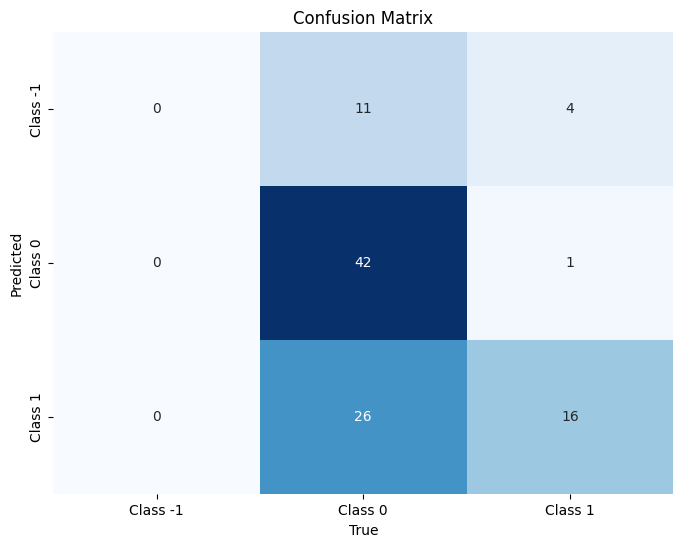

********************************************************************************
Confusion matrix for prompt Act as a professional psychologist who performs an observational study on dehumanization. The growing conceptual literature offers new perspectives on dehumanization that contribute to a deeper understanding of this phenomenon, especially when coupled with the work of specialist scholars in neuroscience, psychology, philosophy, genocide studies, and computational linguistics. The most prominent contemporary theories from these disciplines include the (i) UH-NH model of dehumanization that delineates the animalistic and mechanistic dehumanization by Haslam (ii) model within the mind perception theory which distinguishes between denying human agency and experience from Epley and Waytz (iii) the Dehumanized Perception Model within the stereotype content model, which distinguishes between denying competence and warmth by Harris and Fiske (iv) a mixed model of (de)humanization by Li 

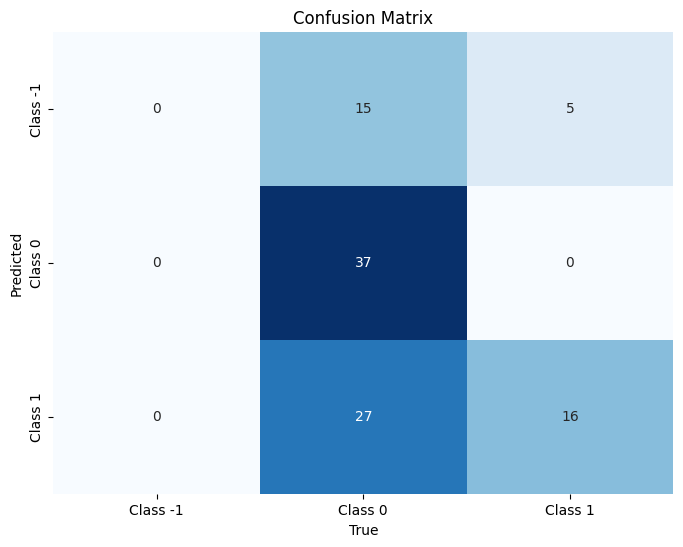

********************************************************************************
Confusion matrix for prompt I'm going to provide you with a list of sentences in Russian delimited by triple backticks. Your task is to assign a binary label to every sentence in Russian: 1 if it contains the dehumanization of Ukrainians and 0 if it does not contain the dehumanization of Ukrainians. The quantity of labels in your output should equal the quantity of the sentences provided. Output the result in the format of a list of these binary labels in the same order as the order of sentences provided in the format like [1, 0, 0, 1]. Do not output anything else.


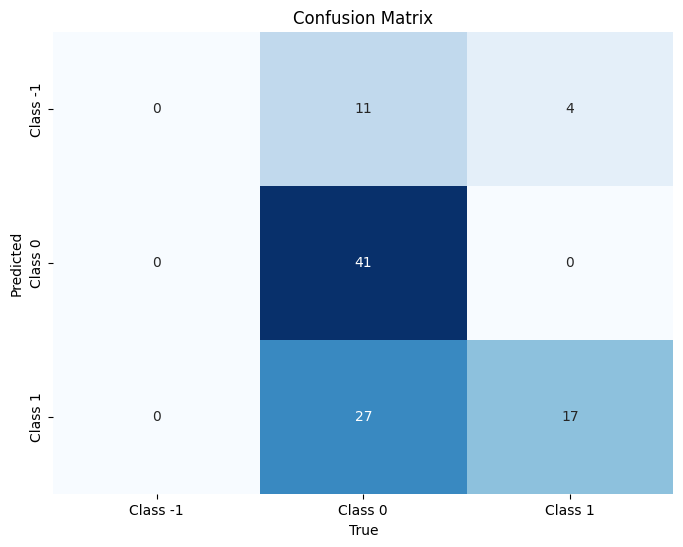

********************************************************************************
Confusion matrix for prompt Act as a professional social scientist who performs an observational study on dehumanization. ﻿Дегуманізація в контексті нашого дослідження — це таке представлення в тексті групи людей, яке формує образ, позбавлений всіх або деяких унікально людських рис або рис, властивих всім живим істотам.

Будь ласка, читайте речення повністю. Кожне додаткове слово може містити контекст, який може вплинути на відповідь.
Якщо ви бачите в тексті посилання, будь ласка, ігноруйте їх — зміст матеріалів за посиланням не має впливати на ваші відповіді.

Дегуманізація присутня, якщо в тексті є хоча б одна з перерахованих нижче ознак дегуманізації українців:
1. Прирівнювання українців до неістот, наприклад, до хвороби, вірусів, сил природи, об’єктів, інструментів, майна. Таке прирівнювання може виражатись також опосередковано: наприклад, в “утилизировать укров”, поняття “утилизировать” непрямо вказує

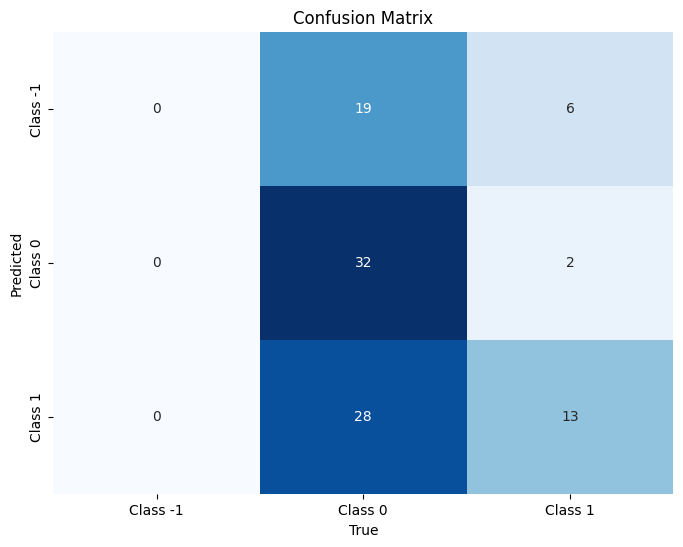

********************************************************************************
Confusion matrix for prompt ﻿Дегуманізація в контексті нашого дослідження — це таке представлення в тексті групи людей, яке формує образ, позбавлений всіх або деяких унікально людських рис або рис, властивих всім живим істотам.

Будь ласка, читайте речення повністю. Кожне додаткове слово може містити контекст, який може вплинути на відповідь.
Якщо ви бачите в тексті посилання, будь ласка, ігноруйте їх — зміст матеріалів за посиланням не має впливати на ваші відповіді.

Дегуманізація присутня, якщо в тексті є хоча б одна з перерахованих нижче ознак дегуманізації українців:
1. Прирівнювання українців до неістот, наприклад, до хвороби, вірусів, сил природи, об’єктів, інструментів, майна. Таке прирівнювання може виражатись також опосередковано: наприклад, в “утилизировать укров”, поняття “утилизировать” непрямо вказує на те, що йдеться про неістот, а в “воевать до последнего украинца” вказується на роль україн

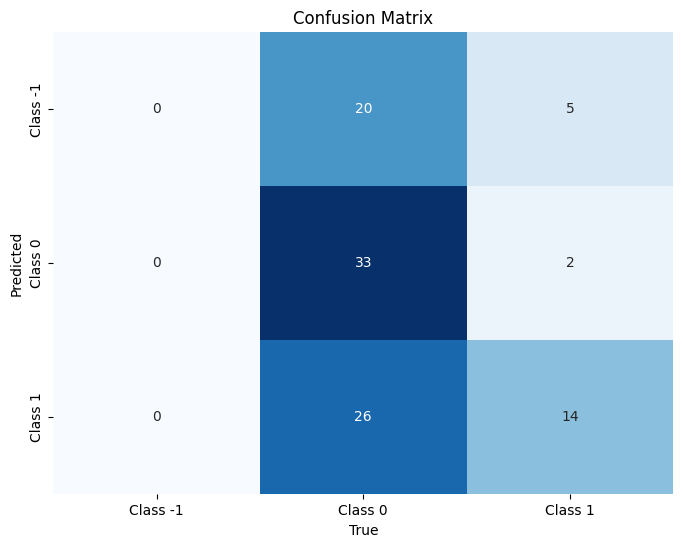

In [450]:
show_conf_matrix()